In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

bsky_df = pd.read_csv('/Users/chloexc/Documents/Diffusion/data/bsky_reply_stats.csv')
ts_df = pd.read_csv('/Users/chloexc/Documents/Diffusion/data/ts_reply_stats.csv')

ts_df.rename(columns={'topic': 'topic_label'}, inplace=True)

In [9]:

columns_to_keep = ['platform', 'topic_label', 'max_depth', 'size', 'breadth', 'structural_virality']
bsky_df = bsky_df[columns_to_keep].reset_index(drop=True)
ts_df = ts_df[columns_to_keep].reset_index(drop=True)

df = pd.concat([bsky_df, ts_df], ignore_index=True)
df = df.dropna(subset=['topic_label'])

metrics = ['max_depth', 'size', 'breadth', 'structural_virality']

def empirical_ccdf(data):
    sorted_data = np.sort(data)
    ccdf = 1 - np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, ccdf

def compare_ccdf(data, metric):
    for topic in data['topic_label'].unique():
        subset = data[data['topic_label'] == topic][metric].dropna()
        sorted_vals, ccdf_vals = empirical_ccdf(subset)
        plt.plot(sorted_vals, ccdf_vals, label=f'{topic}', linewidth=2)
    plt.xscale('linear')
    plt.yscale('log')
    plt.xlabel(metric)
    plt.ylabel('CCDF (%)')
    plt.title(f'CCDF of {metric} by Topic')
    plt.legend()
    plt.grid()



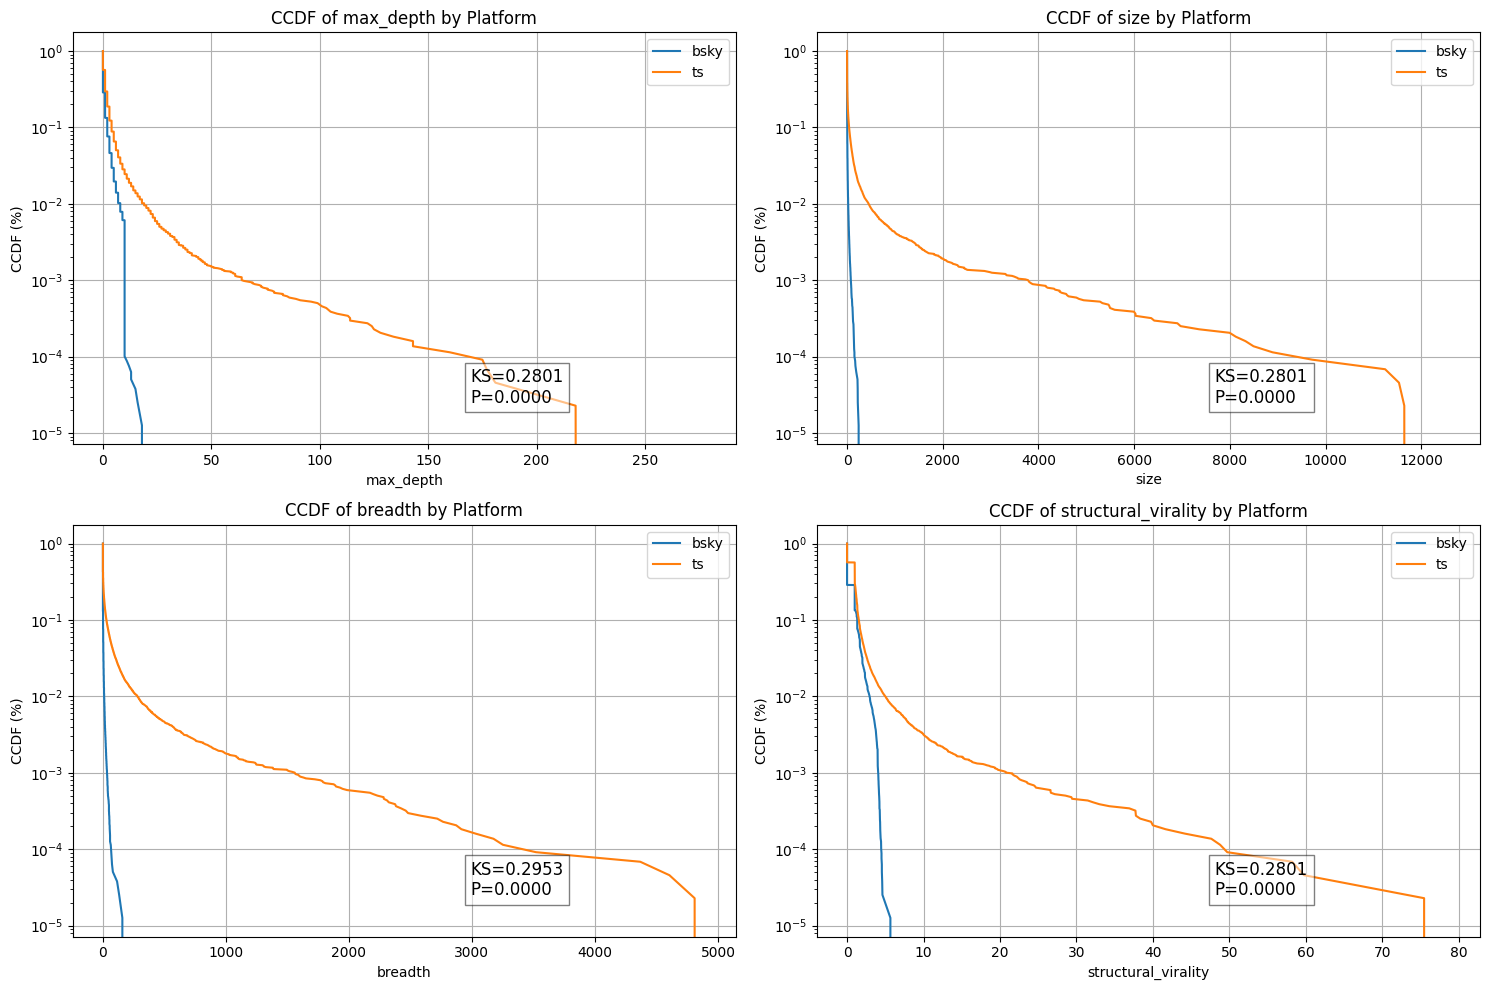

In [15]:
# general platform comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    for platform in ['bsky', 'ts']:
        values = df[df['platform'] == platform][metric].dropna()
        sorted_vals = np.sort(values)
        ccdf = 1 - np.arange(1, len(sorted_vals) + 1) / len(sorted_vals)
        axes[idx].plot(sorted_vals, ccdf, label=f'{platform}')
    axes[idx].set_xscale('linear')
    axes[idx].set_yscale('log')
    axes[idx].set_xlabel(metric)
    axes[idx].set_ylabel('CCDF (%)')
    axes[idx].set_title(f'CCDF of {metric} by Platform')
    axes[idx].legend()
    axes[idx].grid()
    
    # mark the KS statistic and p-value
    ks_stat, p_value = ks_overall_df.loc[ks_overall_df['Metric'] == metric, ['KS Statistic', 'P-value']].values[0]
    axes[idx].text(0.6, 0.1, f'KS={ks_stat:.4f}\nP={p_value:.4f}', transform=axes[idx].transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

1. Significant Differences Across Platforms:

- There are statistically significant differences in all metrics between the two platforms, as indicated by the p-values being less than 0.05.

2. Truth Social Exhibits Higher Values:

- The Truth Social platform consistently shows higher values across all metrics, including maximum depth, size, breadth, and structural virality, compared to Bluesky.

3. Bluesky Shows More Concentrated Distributions:

- Bluesky's distributions are more concentrated, with lower values in terms of scale, reach, and depth compared to Truth Social.

4. The Breadth Metric Exhibits the Largest Difference:

- The greatest difference between platforms is observed in the breadth metric, which has the highest KS statistic, indicating a significant divergence in how information spreads.

5. Implications of the Differences:

- The differences suggest that Truth Social facilitates broader and deeper dissemination of content, while Bluesky appears to have a more limited but potentially more focused spread.


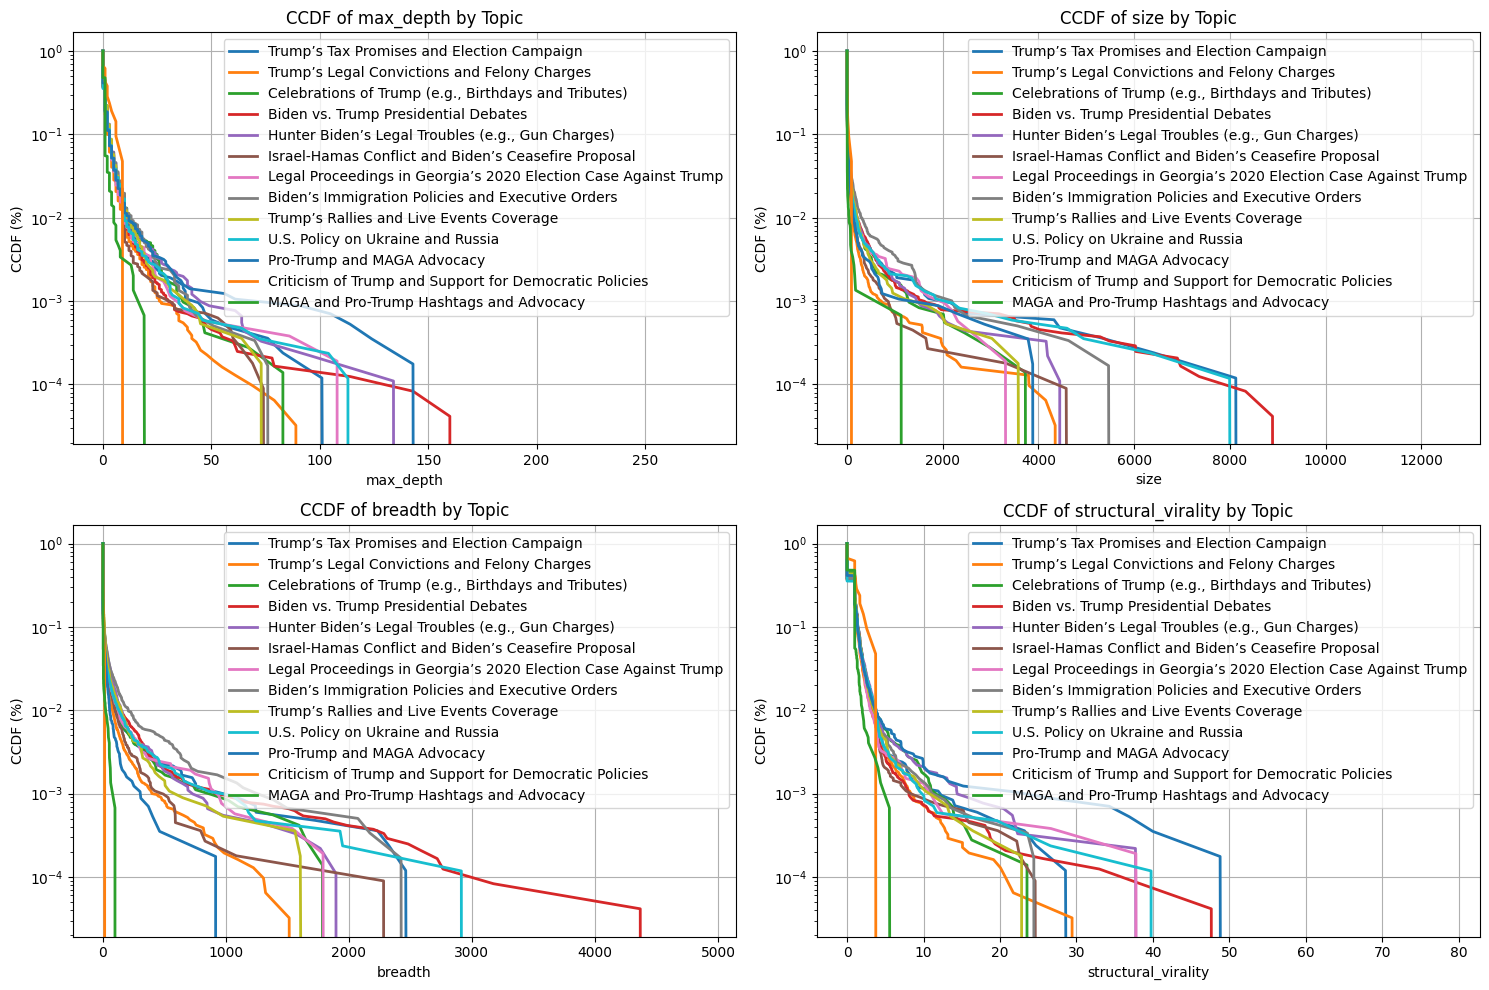

In [10]:
# general topic comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for idx, metric in enumerate(metrics):
    plt.sca(axes[idx])
    compare_ccdf(df, metric)
plt.tight_layout()
plt.show()

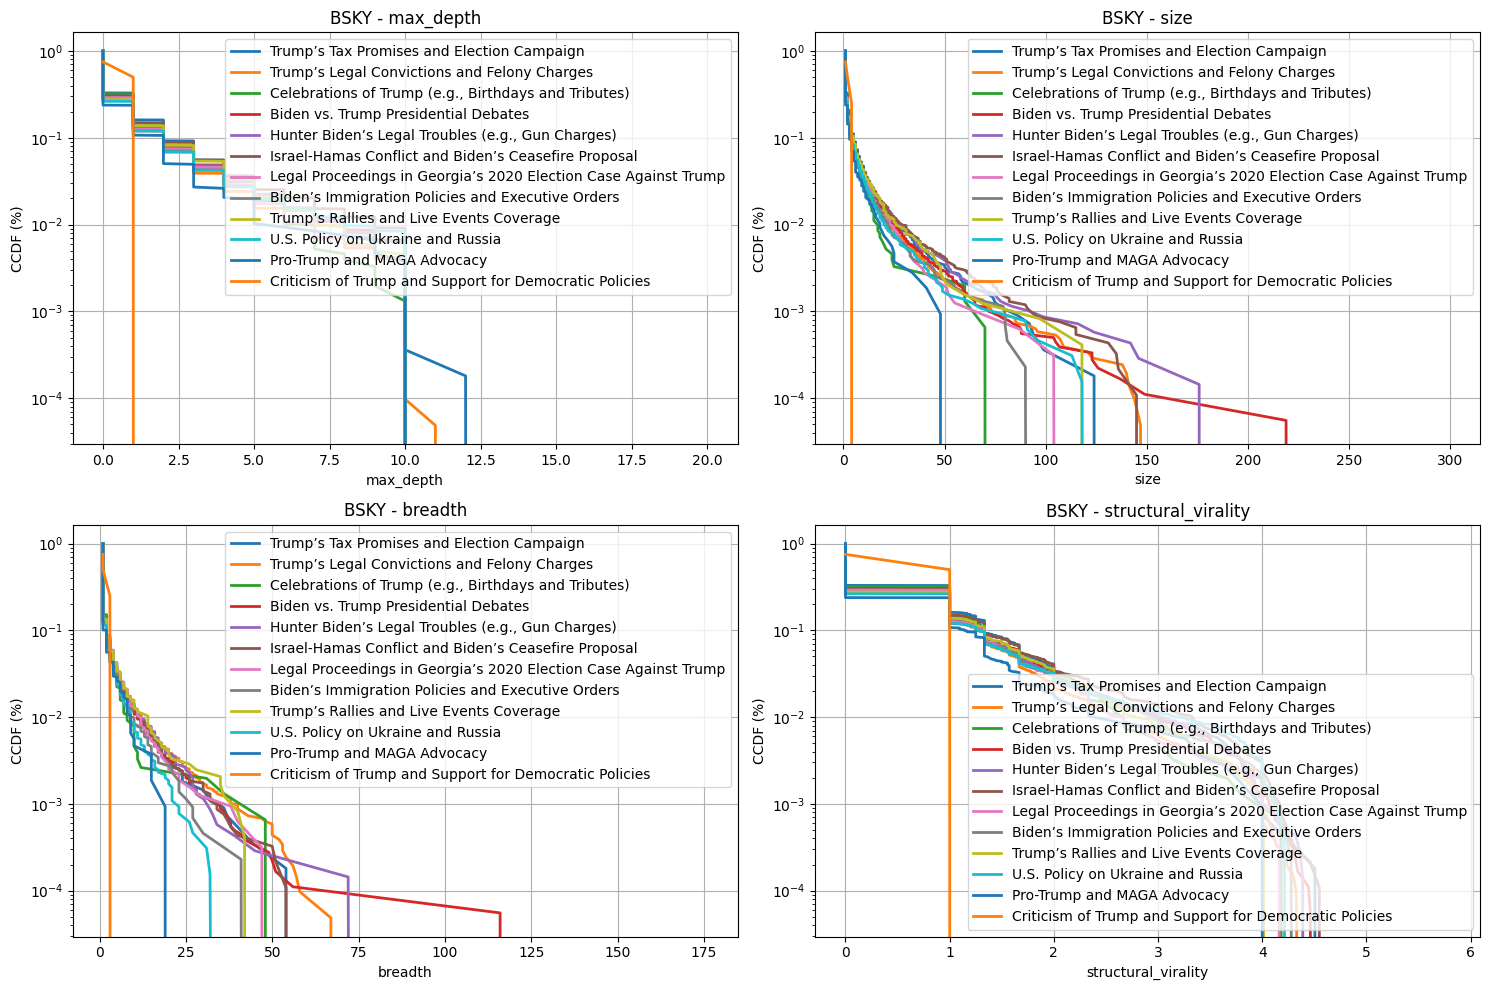

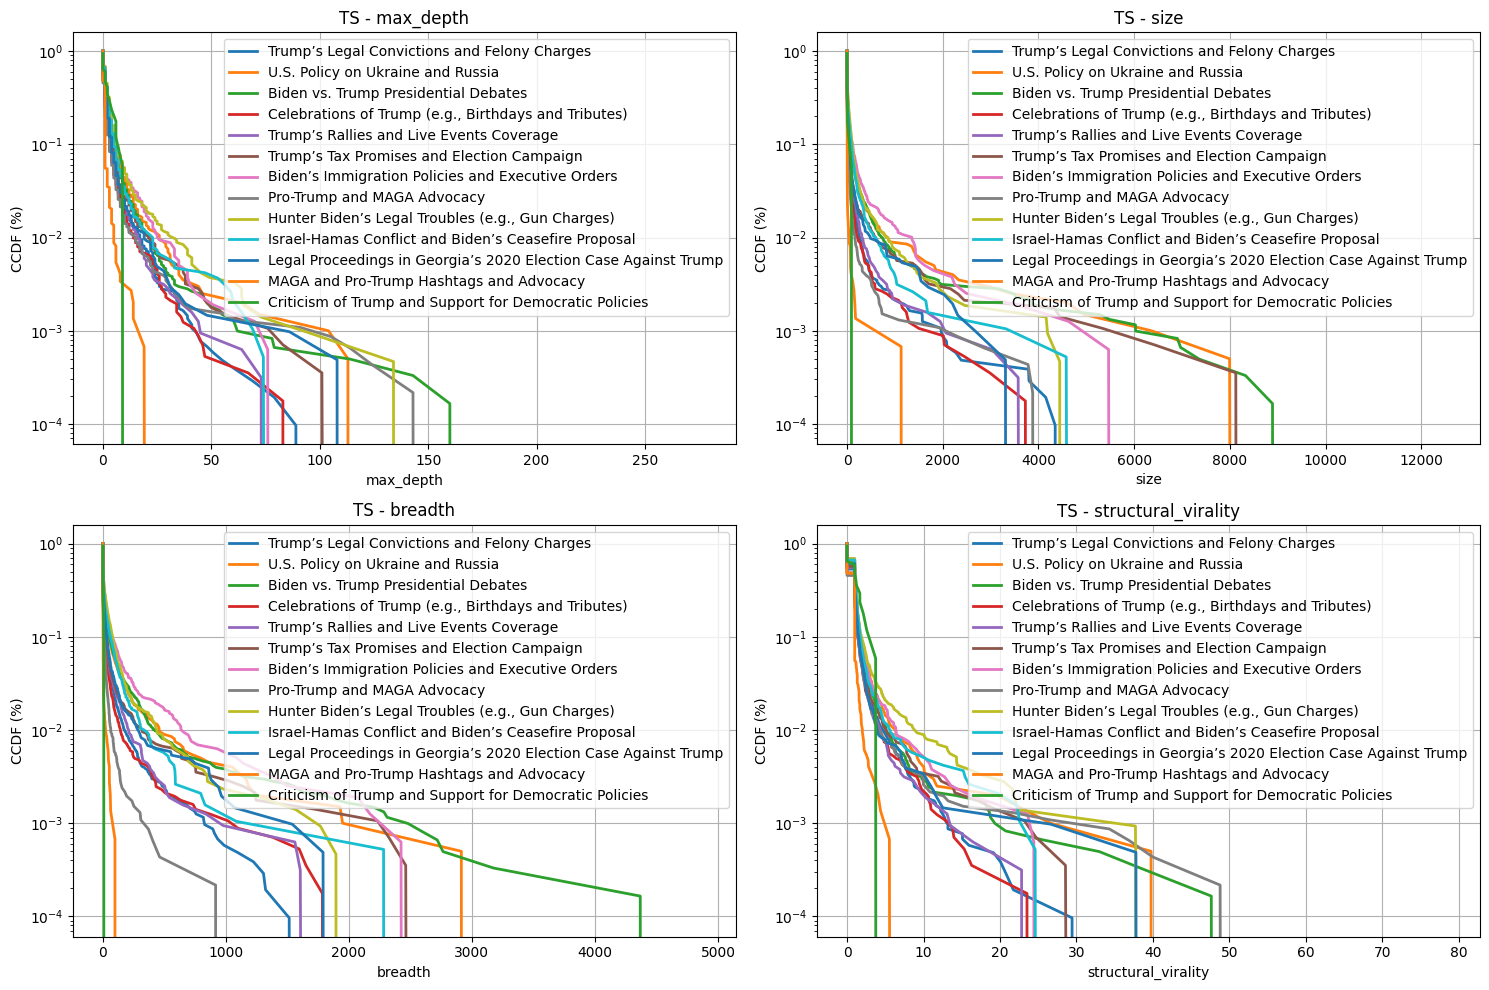

/var/folders/_b/660kkhrj1_scxnln2hw1713w0000gn/T/ipykernel_49548/4294004703.py:20: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ks_stat, p_value = ks_2samp(bsky_values, ts_values)


                 Metric                                              Topic  \
0             max_depth         Trump’s Tax Promises and Election Campaign   
1             max_depth       Trump’s Legal Convictions and Felony Charges   
2             max_depth  Celebrations of Trump (e.g., Birthdays and Tri...   
3             max_depth               Biden vs. Trump Presidential Debates   
4             max_depth  Hunter Biden’s Legal Troubles (e.g., Gun Charges)   
5             max_depth  Israel-Hamas Conflict and Biden’s Ceasefire Pr...   
6             max_depth  Legal Proceedings in Georgia’s 2020 Election C...   
7             max_depth  Biden’s Immigration Policies and Executive Orders   
8             max_depth           Trump’s Rallies and Live Events Coverage   
9             max_depth                  U.S. Policy on Ukraine and Russia   
10            max_depth                        Pro-Trump and MAGA Advocacy   
11            max_depth  Criticism of Trump and Support for Demo

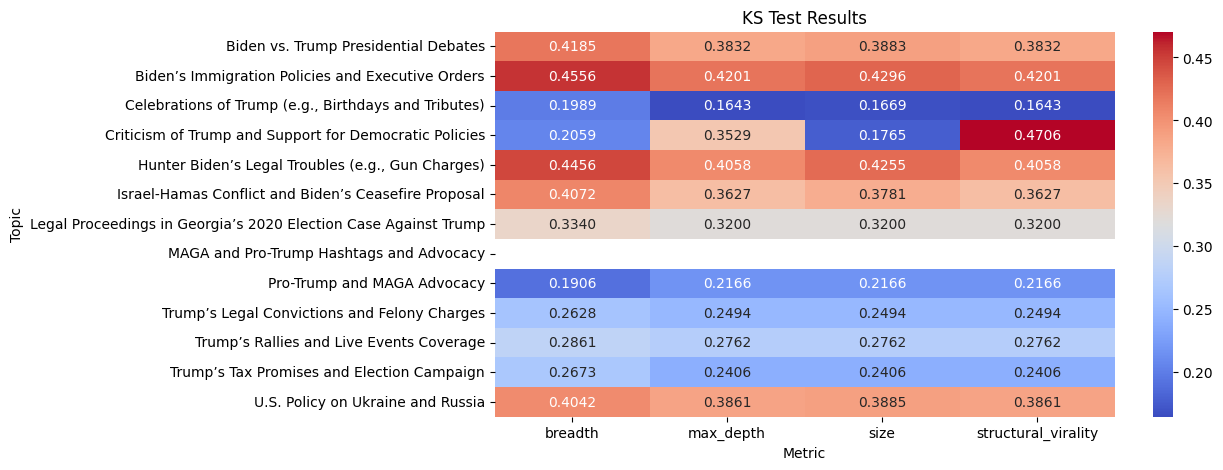

In [11]:


# comparison by platform & by topic
for platform in ['bsky', 'ts']:
    platform_data = df[df['platform'] == platform]
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    for idx, metric in enumerate(metrics):
        plt.sca(axes[idx])
        compare_ccdf(platform_data, metric)
        plt.title(f'{platform.upper()} - {metric}')
    plt.tight_layout()
    plt.show()

# ke test results
ks_results = []
for metric in metrics:
    for topic in df['topic_label'].unique():
        topic_data = df[df['topic_label'] == topic]
        bsky_values = topic_data[topic_data['platform'] == 'bsky'][metric].dropna()
        ts_values = topic_data[topic_data['platform'] == 'ts'][metric].dropna()
        ks_stat, p_value = ks_2samp(bsky_values, ts_values)
        ks_results.append({'Metric': metric, 'Topic': topic, 'KS Statistic': ks_stat, 'P-value': p_value})

ks_df = pd.DataFrame(ks_results)
print(ks_df)
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.heatmap(ks_df.pivot(index='Topic', columns='Metric', values='KS Statistic'), annot=True, fmt='.4f', cmap='coolwarm')
plt.title('KS Test Results')
plt.show()


- All four metrics (max_depth, size, breadth, structural_virality) show statistically significant differences.

- Largest Differences Observed in Breadth and Structural Virality

- Highly Differentiated Topics:
Topics such as:
"Hunter Biden's Legal Troubles"
"Israel-Hamas Conflict"
"Trump's Rallies and Live Events" show larger KS values across multiple metrics, suggesting that these topics experience widely different engagement patterns on each platform.

- Less Differentiated Topics:
Topics like:
"Criticism of Trump and Support for Democratic Policies"
"Pro-Trump and MAGA Advocacy"
exhibit smaller KS values, meaning that user behavior around these topics is more consistent across both platforms.

- Topics with Small Sample Sizes:
Some topics, such as "MAGA and Pro-Trump Hashtags and Advocacy," resulted in NaN values in the KS test, indicating insufficient sample sizes for reliable statistical comparison.
